In [1]:
# numerical computation
import numpy as np

# import matplotlib and allow it to plot inline
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

# import sklearn
from sklearn.preprocessing import LabelEncoder

# visualization library
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":15})     

# dataframe management
import pandas as pd

from operator import itemgetter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
from IPython.display import clear_output

In [2]:
crg_7071 = pd.read_csv('../CRGs/datasets/matrix_CRG7071.csv')
crg_7071.head()

,Edad,Sexo,001,002,003,004,005,006,007,008,...,V09HA,V09HX,V09IA,V09IB,V09IX,V09XA,V10BX,V10XA,V10XX,V30ZZ
0,51,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,86,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,65,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,54,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
crg_7071.shape

(547, 2265)

#### Controlamos si hay algún valor nulo con:

In [4]:
Edad = crg_7071[crg_7071.columns[0:1]]
columnas_Edad = list(Edad.columns.values)

Genero = crg_7071[crg_7071.columns[1:2]]
columnas_Edad = list(Edad.columns.values)

Diagnostico = crg_7071[crg_7071.columns[2:1519]]
columnas_Diagnostico = list(Diagnostico.columns.values)

Farmacia = crg_7071[crg_7071.columns[1519:]]
columnas_Farmacia = list(Farmacia.columns.values)

N_Pacientes = crg_7071.shape[0]

In [5]:
print(Edad.isnull().any().any())
print(Genero.isnull().any().any())
print(Diagnostico.isnull().any().any())
print(Farmacia.isnull().any().any())

False
False
False
False


#### Ahora con Género

In [6]:
femenino = Genero[Genero == 2]
femenino = femenino.fillna(value =0)

masculino = Genero[Genero == 1]
masculino = masculino.fillna(value =0)

femenino = femenino['Sexo'].tolist()
Genero.insert(1, 'Femenino', femenino)

masculino = masculino['Sexo'].tolist()
Genero.insert(2, 'Masculino', masculino)

del(Genero['Sexo'])
Genero = (Genero>0.0)*1

### Ahora que tenemos todos los datos bien estructurados, vamos a volver a juntarlos

In [7]:
crg_7071_new = pd.concat([Edad, Genero, Diagnostico, Farmacia], axis = 1)
columnas_data =list(crg_7071_new.columns.values)
print(crg_7071_new.shape)
crg_7071_new.head()

(547, 2266)


,Edad,Femenino,Masculino,001,002,003,004,005,006,007,...,V09HA,V09HX,V09IA,V09IB,V09IX,V09XA,V10BX,V10XA,V10XX,V30ZZ
0,51,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,77,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,86,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,65,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,54,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
crg_7071_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Edad,547.0,66.223035,11.885965,16.0,58.0,65.0,77.0,92.0
Femenino,547.0,0.557587,0.497127,0.0,0.0,1.0,1.0,1.0
Masculino,547.0,0.442413,0.497127,0.0,0.0,0.0,1.0,1.0
001,547.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
002,547.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
003,547.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
004,547.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
005,547.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
006,547.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
007,547.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [9]:
edad = crg_7071_new[crg_7071_new.columns[:1]]
columnas_edad = list(edad.columns.values)

genero = crg_7071_new[crg_7071_new.columns[1:3]]
columnas_genero = list(genero.columns.values)

diagnostico = crg_7071_new[crg_7071_new.columns[3:1520]]
columnas_diagnostico = list(diagnostico.columns.values)

farmacia = crg_7071_new[crg_7071_new.columns[1520:]]
columnas_farmacia = list(farmacia.columns.values)

In [10]:
enfermedades = diagnostico[diagnostico.columns[:999]]
columnas_enfermedades = list(enfermedades.columns.values)

codigo_v = diagnostico[diagnostico.columns[999:1090]]
columnas_codigo_v = list(codigo_v.columns.values)


In [11]:
N_mujeres = crg_7071_new[crg_7071_new['Femenino']==1].shape[0]

print('Porcenjate Mujeres: %.3f'% round((N_mujeres/N_Pacientes)*100, 3))

N_hombres = crg_7071_new[crg_7071_new['Masculino']==1].shape[0]

print('Porcenjate Hombres: %.3f'% round((N_hombres/N_Pacientes)*100, 3))

Porcenjate Mujeres: 55.759
Porcenjate Hombres: 44.241


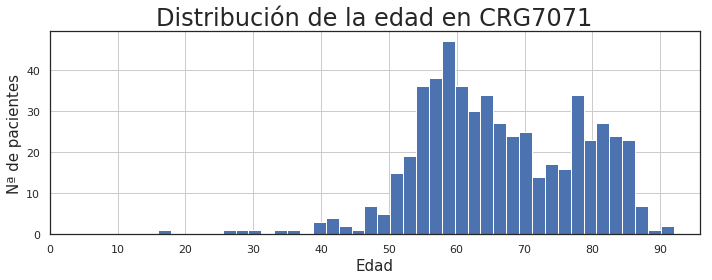

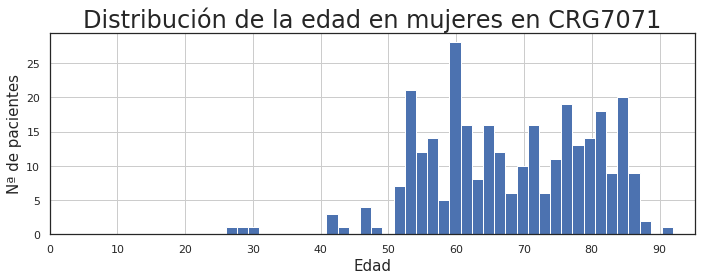

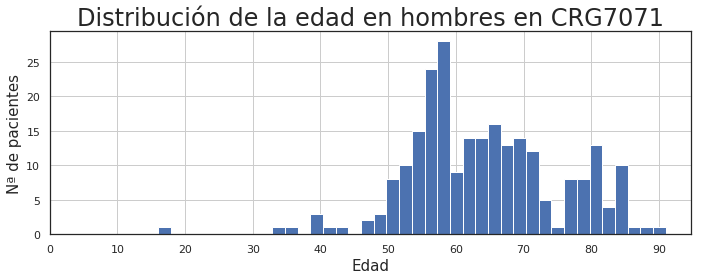

In [12]:
C = crg_7071_new[crg_7071_new.columns[:1]]
plt.figure(figsize=(10,4))
plt.hist(C.as_matrix(), bins=40)
plt.grid()
plt.xticks(range(0, 100, 10))
plt.xlabel('Edad')
plt.ylabel('Nª de pacientes')
plt.title('Distribución de la edad en CRG7071')
plt.tight_layout()
plt.savefig("pictures/CRG7071/CRG7071_EDAD.png")  
plt.show()

A = crg_7071_new[crg_7071_new.columns[:1]][crg_7071_new.Femenino==1]
plt.figure(figsize=(10,4))
plt.hist(A.as_matrix(), bins=40)
plt.grid()
plt.xticks(range(0, 100, 10))
plt.xlabel('Edad')
plt.ylabel('Nª de pacientes')
plt.title('Distribución de la edad en mujeres en CRG7071')
plt.tight_layout()

plt.savefig("pictures/CRG7071/CRG7071_EDAD_mujeres.png")  
plt.show()

B = crg_7071_new[crg_7071_new.columns[:1]][crg_7071_new.Masculino==1]
plt.figure(figsize=(10,4))
plt.hist(B.as_matrix(), bins=40)
plt.grid()
plt.xticks(range(0, 100, 10))
plt.xlabel('Edad')
plt.ylabel('Nª de pacientes')
plt.title('Distribución de la edad en hombres en CRG7071')
plt.tight_layout()

plt.savefig("pictures/CRG7071/CRG7071_EDAD_HOMBRES.png")        
plt.show()

# Ocurrencia

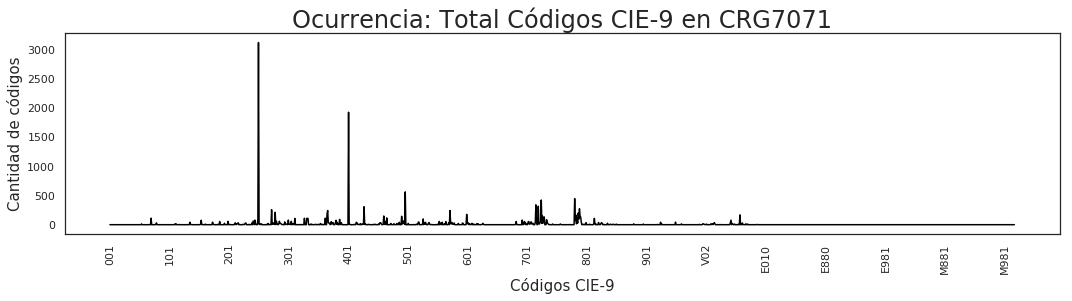

In [13]:
ploting = crg_7071_new[columnas_diagnostico].sum()

plt.figure(figsize=(15,4))
plt.plot(ploting, 'black')
plt.xticks(range(0, 1517, 100), rotation=90)
plt.ylabel('Cantidad de códigos')        
plt.xlabel('Códigos CIE-9')
plt.tight_layout()
plt.title('Ocurrencia: Total Códigos CIE-9 en CRG7071')

plt.savefig("pictures/CRG7071/CRG7071_O_CIE.png")     
plt.show()

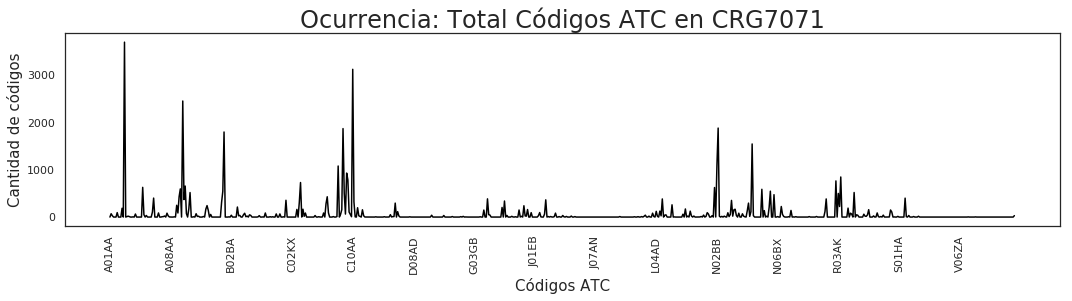

In [14]:
ploting = crg_7071_new[columnas_farmacia].sum()

plt.figure(figsize=(15,4))
plt.plot(ploting, 'black')
plt.xticks(range(0, len(ploting), 50), rotation=90)
plt.ylabel('Cantidad de códigos')        
plt.xlabel('Códigos ATC')
plt.tight_layout()

plt.title('Ocurrencia: Total Códigos ATC en CRG7071')

plt.savefig("pictures/CRG7071/CRG7071_O_ATC.png")     
plt.show()

## Ocurrencia de códigos CIE-9 según el genero

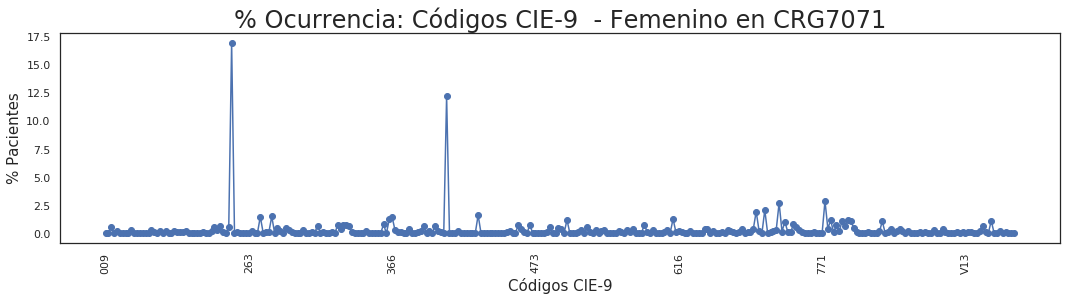

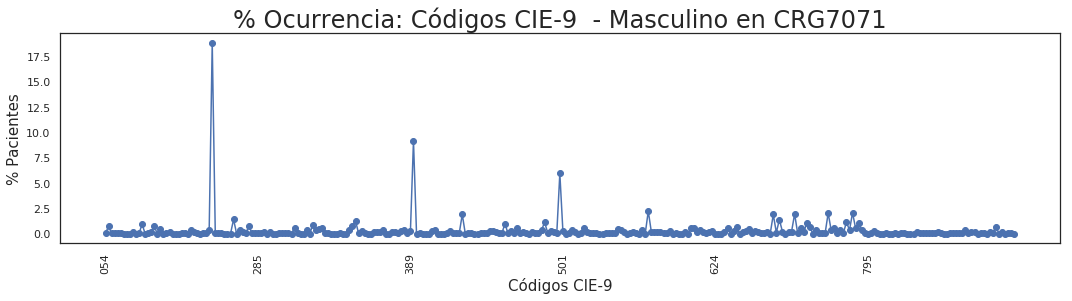

In [15]:
for g in columnas_genero:
    A = crg_7071_new[columnas_diagnostico][crg_7071_new[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        cie9 = [columnas_diagnostico[i] for i in list(ploting.nonzero()[0])]
        valor = [p for p in ploting if p !=0]
        diag_valor = pd.DataFrame({'Código' : cie9, 'Valor' : valor})
        diag_valor = diag_valor.set_index('Código')
        
        plt.figure(figsize=(15,4))
        #plt.grid()
        plt.plot(diag_valor, 'bo-')
        plt.xticks(range(0, len(valor), 50), rotation=90)
        
        plt.ylabel('% Pacientes')        
        plt.xlabel('Códigos CIE-9')
        plt.tight_layout()
        plt.title('% Ocurrencia: Códigos CIE-9  - {} en CRG7071'.format(g))
        
        plt.savefig("pictures/CRG7071/CRG7071_O_CIE_{}.png".format(g))        
        plt.show()


In [16]:
for g in columnas_genero:
    A = crg_7071_new[columnas_enfermedades][crg_7071_new[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        MAX_valor = pd.DataFrame({'Código' : columnas_enfermedades, 'Valor' : ploting})
        MAX_valor = MAX_valor.set_index('Código')
        print('Grupos mayoritarios para {}'.format(g))
        print(MAX_valor.sort_index(by='Valor',  ascending=False).head())

Grupos mayoritarios para Femenino
            Valor
Código           
250     17.526502
401     12.629985
780      2.988390
724      2.806663
719      2.150429
Grupos mayoritarios para Masculino
            Valor
Código           
250     19.379195
401      9.451902
496      6.138143
571      2.307047
788      2.139262


## Ocurrencia  de ATC según el genero

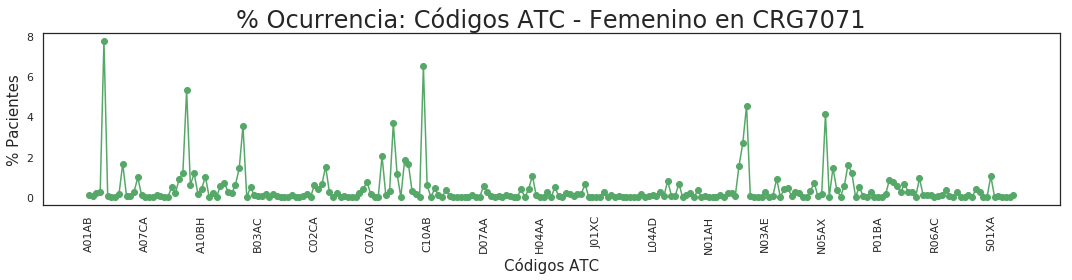

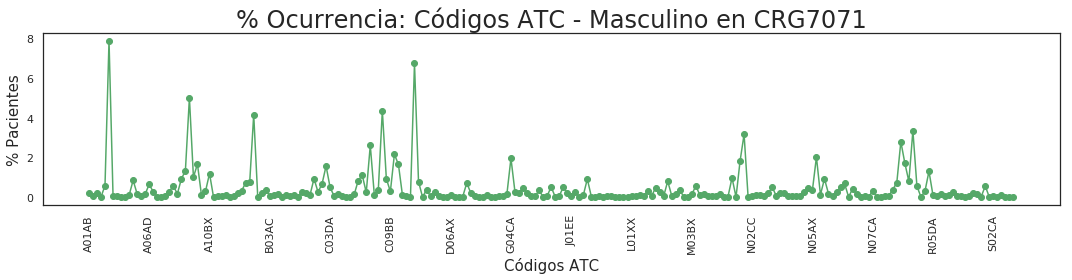

In [17]:
for g in columnas_genero:
    A = crg_7071_new[columnas_farmacia][crg_7071_new[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        atc = [columnas_farmacia[i] for i in list(ploting.nonzero()[0])]
        valor = [p for p in ploting if p !=0]
        diag_valor = pd.DataFrame({'Código' : atc, 'Valor' : valor})
        diag_valor = diag_valor.set_index('Código')
        
        plt.figure(figsize=(15,4))
        #plt.grid()
        plt.plot(diag_valor, 'go-')
        plt.xticks(range(0, len(valor), 15), rotation=90)
        
        plt.ylabel('% Pacientes')        
        plt.xlabel('Códigos ATC')
        plt.title('% Ocurrencia: Códigos ATC - {} en CRG7071'.format(g))
        plt.tight_layout()
        plt.savefig("pictures/CRG7071/CRG7071_O_ATC_{}.png".format(g))        
        plt.show()

In [18]:
for g in columnas_genero:
    A = crg_7071_new[columnas_farmacia][crg_7071_new[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        MAX_valor = pd.DataFrame({'Código' : columnas_farmacia, 'Valor' : ploting})
        MAX_valor = MAX_valor.set_index('Código')
        print('Grupos mayoritarios para {}'.format(g))
        print(MAX_valor.sort_index(by='Valor',  ascending=False).head())

Grupos mayoritarios para Femenino
           Valor
Código          
A02BC   7.764706
C10AA   6.497738
A10BA   5.314027
N02BE   4.553846
N05BA   4.155656
Grupos mayoritarios para Masculino
           Valor
Código          
A02BC   7.895808
C10AA   6.756207
A10BA   5.011193
C09AA   4.365079
B01AC   4.166667


--------------------------------------------------------------

# Presencia

In [19]:
presencia = (crg_7071_new[crg_7071_new.columns[3:]]>0)*1
crg_7071_new_P = pd.concat([Edad, Genero, presencia], axis = 1)

In [20]:
crg_7071_new_P.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Edad,547.0,66.223035,11.885965,16.0,58.0,65.0,77.0,92.0
Femenino,547.0,0.557587,0.497127,0.0,0.0,1.0,1.0,1.0
Masculino,547.0,0.442413,0.497127,0.0,0.0,0.0,1.0,1.0
001,547.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
002,547.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
003,547.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
004,547.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
005,547.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
006,547.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
007,547.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


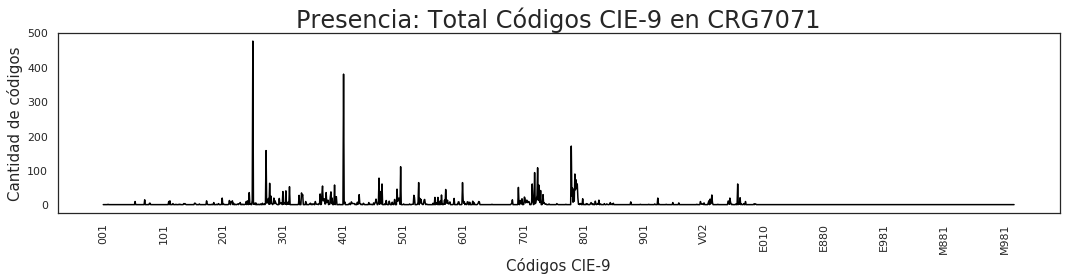

In [21]:
ploting = crg_7071_new_P[columnas_diagnostico].sum()

plt.figure(figsize=(15,4))
plt.plot(ploting, 'black')
plt.xticks(range(0, 1517, 100), rotation=90)
plt.ylabel('Cantidad de códigos')        
plt.xlabel('Códigos CIE-9')
plt.title('Presencia: Total Códigos CIE-9 en CRG7071')
plt.tight_layout()
plt.savefig("pictures/CRG7071/CRG7071_P_CIE.png")     
plt.show()

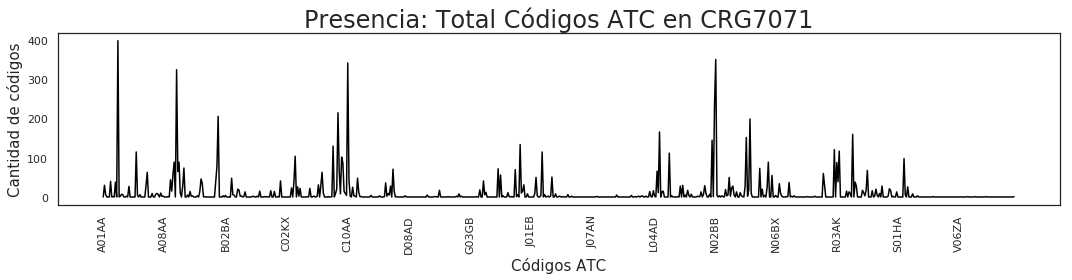

In [22]:
ploting = crg_7071_new_P[columnas_farmacia].sum()

plt.figure(figsize=(15,4))
plt.plot(ploting, 'black')
plt.xticks(range(0, len(ploting), 50), rotation=90)
plt.ylabel('Cantidad de códigos')        
plt.xlabel('Códigos ATC')
plt.title('Presencia: Total Códigos ATC en CRG7071')
plt.tight_layout()
plt.savefig("pictures/CRG7071/CRG7071_P_ATC.png")     
plt.show()

## Presencia de diagnosticos según el grupo de edad y genero

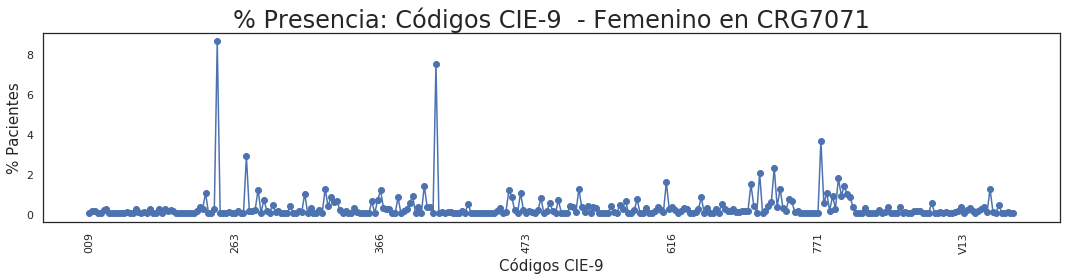

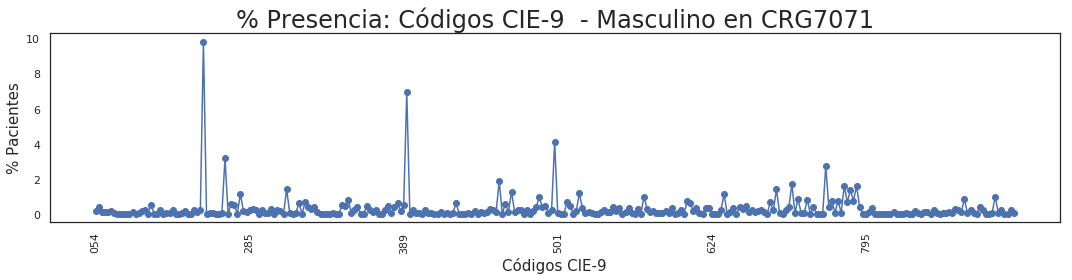

In [23]:
for g in columnas_genero:
    A = crg_7071_new_P[columnas_diagnostico][crg_7071_new_P[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        cie9 = [columnas_diagnostico[i] for i in list(ploting.nonzero()[0])]
        valor = [p for p in ploting if p !=0]
        diag_valor = pd.DataFrame({'Código' : cie9, 'Valor' : valor})
        diag_valor = diag_valor.set_index('Código')
        
        plt.figure(figsize=(15,4))
        #plt.grid()
        plt.plot(diag_valor, 'bo-')
        plt.xticks(range(0, len(valor), 50), rotation=90)
        
        plt.ylabel('% Pacientes')        
        plt.xlabel('Códigos CIE-9')
        plt.title('% Presencia: Códigos CIE-9  - {} en CRG7071'.format(g))
        plt.tight_layout()
        plt.savefig("pictures/CRG7071/CRG7071_P_CIE_{}.png".format(g))        
        plt.show()



In [24]:
for g in columnas_genero:
    A = crg_7071_new_P[columnas_diagnostico][crg_7071_new_P[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        MAX_valor = pd.DataFrame({'Código' : columnas_diagnostico, 'Valor' : ploting})
        MAX_valor = MAX_valor.set_index('Código')
        print('Grupos mayoritarios para {}'.format(g))
        print(MAX_valor.sort_index(by='Valor',  ascending=False).head())

Grupos mayoritarios para Femenino
           Valor
Código          
250     8.634274
401     7.518056
780     3.644123
272     2.889035
724     2.298096
Grupos mayoritarios para Masculino
           Valor
Código          
250     9.819361
401     6.947661
496     4.122279
272     3.195924
780     2.732747


## Presencia  de farmacos según el genero y edad

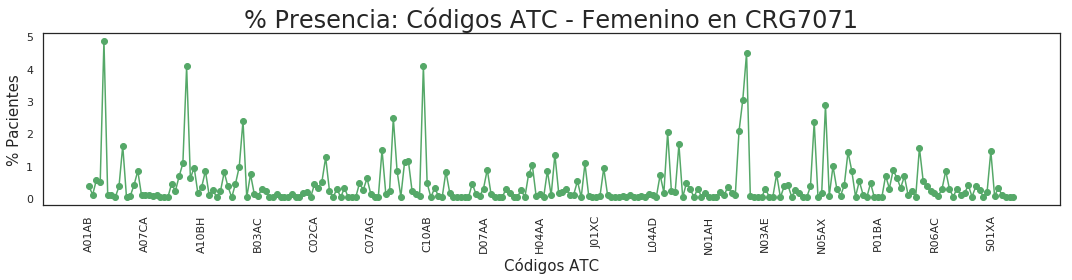

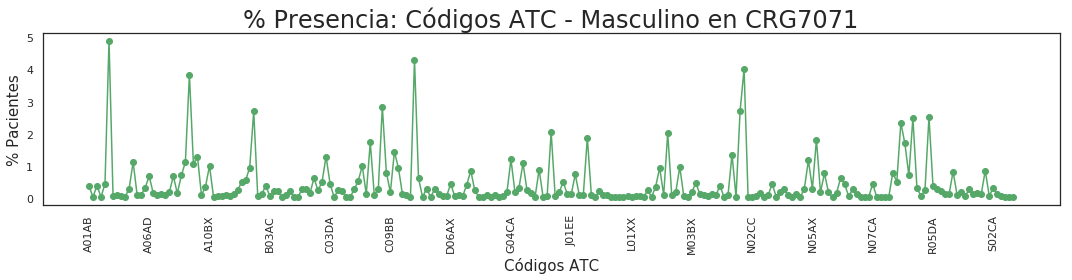

In [25]:
for g in columnas_genero:
    A = crg_7071_new_P[columnas_farmacia][crg_7071_new_P[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        atc = [columnas_farmacia[i] for i in list(ploting.nonzero()[0])]
        valor = [p for p in ploting if p !=0]
        diag_valor = pd.DataFrame({'Código' : atc, 'Valor' : valor})
        diag_valor = diag_valor.set_index('Código')
        
        plt.figure(figsize=(15,4))
        #plt.grid()
        plt.plot(diag_valor, 'go-')
        plt.xticks(range(0, len(valor), 15), rotation=90)
        
        plt.ylabel('% Pacientes')        
        plt.xlabel('Códigos ATC')
        plt.title('% Presencia: Códigos ATC - {} en CRG7071'.format(g))
        plt.tight_layout()
        plt.savefig("pictures/CRG7071/CRG7071_P_ATC_{}.png".format(g))        
        plt.show()

In [26]:
for g in columnas_genero:
    A = crg_7071_new_P[columnas_farmacia][crg_7071_new[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        MAX_valor = pd.DataFrame({'Código' : columnas_farmacia, 'Valor' : ploting})
        MAX_valor = MAX_valor.set_index('Código')
        print('Grupos mayoritarios para {}'.format(g))
        print(MAX_valor.sort_index(by='Valor',  ascending=False).head())

Grupos mayoritarios para Femenino
           Valor
Código          
A02BC   4.866793
N02BE   4.489197
C10AA   4.090623
A10BA   4.069645
N02BB   3.041745
Grupos mayoritarios para Masculino
           Valor
Código          
A02BC   4.901673
C10AA   4.314646
N02BE   4.021133
A10BA   3.845025
C09AA   2.847080


# Multilabel

In [27]:
crg_7071_with_labels_O = pd.read_csv('../CRGs/datasets/matrix_CRG7071.csv')
crg_7071_with_labels_O['HP'] = np.ones(N_Pacientes, dtype=int)
crg_7071_with_labels_O['Diabetes'] = np.ones(N_Pacientes, dtype=int)
crg_7071_with_labels_O['Otros'] = np.ones(N_Pacientes, dtype=int)
crg_7071_with_labels_O['M01AE'].describe()

count    547.000000
mean       0.700183
std        1.645746
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       14.000000
Name: M01AE, dtype: float64

In [28]:
crg_7071_with_labels_O.to_csv('datasets/label/crg_7071_with_labels_O.csv', index=False)

In [29]:
crg_7071_with_labels_P =pd.concat([Edad, crg_7071[crg_7071.columns[1:2]], presencia], axis = 1)
crg_7071_with_labels_P['HP'] = np.ones(N_Pacientes, dtype=int)
crg_7071_with_labels_P['Diabetes'] = np.ones(N_Pacientes, dtype=int)
crg_7071_with_labels_P['Otros'] = np.ones(N_Pacientes, dtype=int)
crg_7071_with_labels_P['M01AE'].describe()

count    547.000000
mean       0.303473
std        0.460179
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: M01AE, dtype: float64

In [30]:
crg_7071_with_labels_P.to_csv('datasets/label/crg_7071_with_labels_P.csv', index=False)

# Multi clase

In [28]:
crg_7071_with_classes_O = pd.read_csv('../CRGs/datasets/matrix_CRG7071.csv')
crg_7071_with_classes_O['CRG1000'] = np.zeros(N_Pacientes, dtype=int)
crg_7071_with_classes_O['CRG5192'] = np.zeros(N_Pacientes, dtype=int)
crg_7071_with_classes_O['CRG5424'] = np.zeros(N_Pacientes, dtype=int)
crg_7071_with_classes_O['CRG6144'] = np.zeros(N_Pacientes, dtype=int)
crg_7071_with_classes_O['CRG7071'] = np.ones(N_Pacientes, dtype=int)
crg_7071_with_classes_O['M01AE'].describe()

count    547.000000
mean       0.700183
std        1.645746
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       14.000000
Name: M01AE, dtype: float64

In [29]:
crg_7071_with_classes_O.to_csv('datasets/class/crg_7071_with_classes_O.csv', index=False)

In [32]:
crg_7071_with_classes_P = pd.concat([Edad, crg_7071[crg_7071.columns[1:2]], presencia], axis = 1)
crg_7071_with_classes_P['CRG1000'] = np.zeros(N_Pacientes, dtype=int)
crg_7071_with_classes_P['CRG5192'] = np.zeros(N_Pacientes, dtype=int)
crg_7071_with_classes_P['CRG5424'] = np.zeros(N_Pacientes, dtype=int)
crg_7071_with_classes_P['CRG6144'] = np.zeros(N_Pacientes, dtype=int)
crg_7071_with_classes_P['CRG7071'] = np.ones(N_Pacientes, dtype=int)
crg_7071_with_classes_P['M01AE'].describe()

count    547.000000
mean       0.303473
std        0.460179
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: M01AE, dtype: float64

In [33]:
crg_7071_with_classes_P.to_csv('datasets/class/crg_7071_with_classes_P.csv', index=False)